<a href="https://colab.research.google.com/github/chihoang/Springboard_mec-mini-projects/blob/main/Mini_Project_Wrangling_Json_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

## imports for Python, Pandas

In [ ]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [ ]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [ ]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [ ]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


,name,population,state,shortname,info.governor
0,Dade,12345,Florida,FL,Rick Scott
1,Broward,40000,Florida,FL,Rick Scott
2,Palm Beach,60000,Florida,FL,Rick Scott
3,Summit,1234,Ohio,OH,John Kasich
4,Cuyahoga,1337,Ohio,OH,John Kasich


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [ ]:
### 11/22/22: mount to the datasets in Google Drive ###
import os
from google.colab import drive
MOUNTPOINT = '/content/gdrive'
DATADIR = os.path.join(MOUNTPOINT, 'My Drive', 'myfolder')
drive.mount(MOUNTPOINT)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# load json as string
# json.load((open('data/world_bank_projects_less.json')))
json.load((open('/content/gdrive/MyDrive/Colab Notebooks/mec-mini-projects-master/\
mec-5.4.4-json-data-wrangling-mini-project/data/world_bank_projects_less.json')))

[{'_id': {'$oid': '52b213b38594d8a2be17c780'},
  'approvalfy': 1999,
  'board_approval_month': 'November',
  'boardapprovaldate': '2013-11-12T00:00:00Z',
  'borrower': 'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  'closingdate': '2018-07-07T00:00:00Z',
  'country_namecode': 'Federal Democratic Republic of Ethiopia!$!ET',
  'countrycode': 'ET',
  'countryname': 'Federal Democratic Republic of Ethiopia',
  'countryshortname': 'Ethiopia',
  'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  'envassesmentcategorycode': 'C',
  'grantamt': 0,
  'ibrdcommamt': 0,
  'id': 'P129828',
  'idacommamt': 130000000,
  'impagency': 'MINISTRY OF EDUCATION',
  'lendinginstr': 'Investment Project Financing',
  'lendinginstrtype': 'IN',
  'lendprojectcost': 550000000,
  'majorsector_percent': [{'Name': 'Education', 'Percent': 46},
   {'Name': 'Education', 'Percent': 26},
   {'Name': 'Public Administration, Law, and Justice', 'Percent': 16},
   {'Name': 'Educatio

In [ ]:
# load as Pandas dataframe
sample_json_df = pd.read_json('/content/gdrive/MyDrive/Colab Notebooks/mec-mini-projects-master/\
mec-5.4.4-json-data-wrangling-mini-project/data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Name': 'Education for all', 'Percent': 100}","[{'name': 'Education for all', 'code': '65'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Name': 'Other economic management', 'Percent...","[{'name': 'Other economic management', 'code':...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


In [ ]:
sample_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   _id                       2 non-null      object
 1   approvalfy                2 non-null      int64 
 2   board_approval_month      2 non-null      object
 3   boardapprovaldate         2 non-null      object
 4   borrower                  2 non-null      object
 5   closingdate               1 non-null      object
 6   country_namecode          2 non-null      object
 7   countrycode               2 non-null      object
 8   countryname               2 non-null      object
 9   countryshortname          2 non-null      object
 10  docty                     2 non-null      object
 11  envassesmentcategorycode  2 non-null      object
 12  grantamt                  2 non-null      int64 
 13  ibrdcommamt               2 non-null      int64 
 14  id                        2 no

****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

## 1. Find the 10 countries with most projects

In [ ]:
# load as Pandas dataframe
raw_data = pd.read_json('/content/gdrive/MyDrive/Colab Notebooks/mec-mini-projects-master/\
mec-5.4.4-json-data-wrangling-mini-project/data/world_bank_projects.json')

In [ ]:
# overall look at dataset: 500 x 50
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   sector                    500 non-null    object
 1   supplementprojectflg      498 non-null    object
 2   projectfinancialtype      500 non-null    object
 3   prodline                  500 non-null    object
 4   mjtheme                   491 non-null    object
 5   idacommamt                500 non-null    int64 
 6   impagency                 472 non-null    object
 7   project_name              500 non-null    object
 8   mjthemecode               500 non-null    object
 9   closingdate               370 non-null    object
 10  totalcommamt              500 non-null    int64 
 11  id                        500 non-null    object
 12  mjsector_namecode         500 non-null    object
 13  docty                     446 non-null    object
 14  sector1                   

In [ ]:
# look at the first row of dataset 
raw_data.iloc[0]

sector                      [{'Name': 'Primary education'}, {'Name': 'Seco...
supplementprojectflg                                                        N
projectfinancialtype                                                      IDA
prodline                                                                   PE
mjtheme                                                   [Human development]
idacommamt                                                          130000000
impagency                                               MINISTRY OF EDUCATION
project_name                Ethiopia General Education Quality Improvement...
mjthemecode                                                              8,11
closingdate                                              2018-07-07T00:00:00Z
totalcommamt                                                        130000000
id                                                                    P129828
mjsector_namecode           [{'code': 'EX', 'name': 'Education'}

In [ ]:
# top_countries = raw_data.value_counts('countryshortname')
top_countries = raw_data.value_counts('countryname')

In [ ]:
print(type(top_countries))
print(top_countries)

<class 'pandas.core.series.Series'>
countryname
People's Republic of China       19
Republic of Indonesia            19
Socialist Republic of Vietnam    17
Republic of India                16
Republic of Yemen                13
                                 ..
Antigua and Barbuda               1
Republic of Kiribati              1
Republic of Serbia                1
Republic of Poland                1
Republic of Zimbabwe              1
Length: 118, dtype: int64


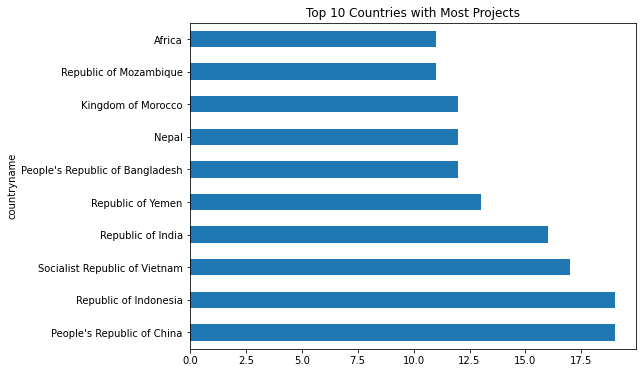

In [ ]:
## plot for visualization
top_countries[:10].plot(kind='barh', ylabel='projects', figsize=(8,6))
plt.title('Top 10 Countries with Most Projects')
plt.show()

## 2. Find the top 10 major project themes (using column 'mjtheme_namecode')

In [ ]:
## let's look at one specific row to see its content 
ind_check = 1
print(raw_data['mjtheme_namecode'][ind_check])
print(raw_data['mjthemecode'][ind_check])
print(type(raw_data['mjthemecode'][ind_check]))

[{'code': '1', 'name': 'Economic management'}, {'code': '6', 'name': 'Social protection and risk management'}]
1,6
<class 'str'>


`mjtheme_namecode` contains a list of dictionaries with keys: `code` and `name`. I propose to proceed in 2 steps:

1. create a dictionary to store (code: name)
2. loop over all rows of dataset, on each row count all codes and accumulate them properly

In [ ]:
## step 1: create a dictionary to store (code: name)
code_name_dict = {}
for lst in raw_data.mjtheme_namecode:
  # print(lst)
  for subl in lst:
    code_num  = int(subl['code'])
    code_name = subl['name']
    if (code_num not in code_name_dict) and (code_name != ''): 
      code_name_dict[code_num] = code_name


In [ ]:
## check result of step 1 above:
# print(code_name_dict)
for k, v in code_name_dict.items():
  print(str(k) + ': ' + str(v) )
print(len(code_name_dict))

8: Human development
1: Economic management
6: Social protection and risk management
5: Trade and integration
2: Public sector governance
11: Environment and natural resources management
7: Social dev/gender/inclusion
4: Financial and private sector development
10: Rural development
9: Urban development
3: Rule of law
11


In [ ]:
## step 2: loop over all rows of dataset, on each row count all codes and accumulate them properly
code_count = {}
for lst in raw_data.mjtheme_namecode:
  # print(lst)
  for subl in lst:
    code_num = int(subl['code']) 
    if code_num in code_count.keys():
      code_count[code_num] += 1
    else:
      code_count[code_num] = 1


In [ ]:
## check result of step 2:
# print(code_count)
for k, v in code_count.items():
  print(str(k) + ': ' +str(v) )
print(len(code_count))

8: 210
11: 250
1: 38
6: 168
5: 77
2: 199
7: 130
4: 146
10: 216
9: 50
3: 15
11


In [ ]:
## sort the result by count:
import operator

dict1 = code_count
sorted_tuples = sorted(dict1.items(), key=operator.itemgetter(1))
# print(sorted_tuples)  # [(1, 1), (3, 4), (2, 9)]
sorted_dict = {k: v for k, v in sorted_tuples}

print(sorted_dict) # {1: 1, 3: 4, 2: 9}
count_list = []
name_list  = []
for k,v in reversed(list(sorted_dict.items())):
  count = code_count[k]
  name  = code_name_dict[k]
  print('count = ' + str(count) + ', code = ' + str(k) + ', name = ' +str(name) )
  count_list.append(count)
  name_list.append(name)


{3: 15, 1: 38, 9: 50, 5: 77, 7: 130, 4: 146, 6: 168, 2: 199, 8: 210, 10: 216, 11: 250}
count = 250, code = 11, name = Environment and natural resources management
count = 216, code = 10, name = Rural development
count = 210, code = 8, name = Human development
count = 199, code = 2, name = Public sector governance
count = 168, code = 6, name = Social protection and risk management
count = 146, code = 4, name = Financial and private sector development
count = 130, code = 7, name = Social dev/gender/inclusion
count = 77, code = 5, name = Trade and integration
count = 50, code = 9, name = Urban development
count = 38, code = 1, name = Economic management
count = 15, code = 3, name = Rule of law


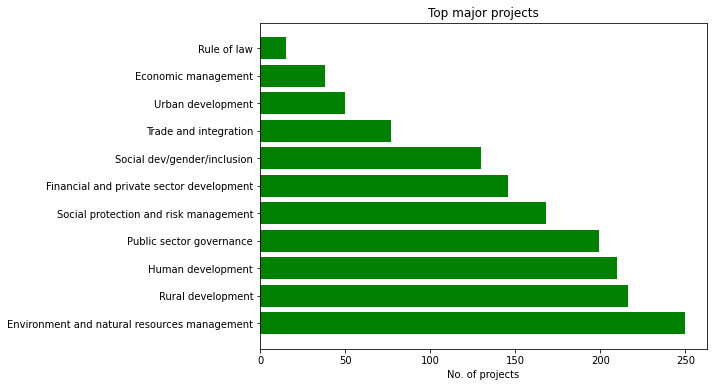

In [ ]:
## visualize results
fig = plt.figure(figsize=(8,6))
# plt.barh(count_list, name_list, color='maroon')
plt.barh(name_list, count_list, color='green')
plt.xlabel("No. of projects")
plt.ylabel("")
plt.title("Top major projects")
plt.show()


## 3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [ ]:
## print to check missing values
for lst in raw_data.mjtheme_namecode[:8]:
  print(lst)

[{'code': '8', 'name': 'Human development'}, {'code': '11', 'name': ''}]
[{'code': '1', 'name': 'Economic management'}, {'code': '6', 'name': 'Social protection and risk management'}]
[{'code': '5', 'name': 'Trade and integration'}, {'code': '2', 'name': 'Public sector governance'}, {'code': '11', 'name': 'Environment and natural resources management'}, {'code': '6', 'name': 'Social protection and risk management'}]
[{'code': '7', 'name': 'Social dev/gender/inclusion'}, {'code': '7', 'name': 'Social dev/gender/inclusion'}]
[{'code': '5', 'name': 'Trade and integration'}, {'code': '4', 'name': 'Financial and private sector development'}]
[{'code': '6', 'name': 'Social protection and risk management'}, {'code': '6', 'name': ''}]
[{'code': '2', 'name': 'Public sector governance'}, {'code': '4', 'name': 'Financial and private sector development'}]
[{'code': '11', 'name': 'Environment and natural resources management'}, {'code': '8', 'name': ''}]


In [ ]:
## update/fill missing name
for lst in raw_data.mjtheme_namecode:
  # print(lst)
  for subl in lst:
    if not subl['name']:
      code = int(subl['code'])
      name = code_name_dict[code]

      # update/fill name
      subl['name'] = name


In [ ]:
## print to check filled values
for lst in raw_data.mjtheme_namecode[:8]:
  print(lst)

[{'code': '8', 'name': 'Human development'}, {'code': '11', 'name': 'Environment and natural resources management'}]
[{'code': '1', 'name': 'Economic management'}, {'code': '6', 'name': 'Social protection and risk management'}]
[{'code': '5', 'name': 'Trade and integration'}, {'code': '2', 'name': 'Public sector governance'}, {'code': '11', 'name': 'Environment and natural resources management'}, {'code': '6', 'name': 'Social protection and risk management'}]
[{'code': '7', 'name': 'Social dev/gender/inclusion'}, {'code': '7', 'name': 'Social dev/gender/inclusion'}]
[{'code': '5', 'name': 'Trade and integration'}, {'code': '4', 'name': 'Financial and private sector development'}]
[{'code': '6', 'name': 'Social protection and risk management'}, {'code': '6', 'name': 'Social protection and risk management'}]
[{'code': '2', 'name': 'Public sector governance'}, {'code': '4', 'name': 'Financial and private sector development'}]
[{'code': '11', 'name': 'Environment and natural resources mana